## Get some images

Get some example images to practice with. 

In [1]:
import pandas as pd

# This notebook assumes you have your folders set up following the Exam Template, and this is in an 'exercise' folder or similar
# Otherwise, adjust your path(s) as needed
# You do not need to strictly follow this approach, do what works for you

data_path = "../data/"
df = pd.read_csv(data_path + "metadata_with_group.csv")

img_path = data_path + "imgs/"
mask_path = data_path + "masks/"

---

## Load 2-3 example images and masks with numpy and inspect / print properties of the array (as a variable)

Refer to https://numpy.org/doc/2.3/reference/generated/numpy.ndarray.html

### Questions (high priority)

* What can you say about the shape and type (what type of number is each value), are they the same or different for different images? 
    * What does a shape of an image tell us? Explain shape output (820, 615, 3) and (820, 615, 4).

* How can we find darkest and brightest pixel values?

* Look at the statistics like minimum and maximum values in the array, do they differ between images, or between images and masks?

#### Questions (low priority)

* To help interpretability (values between 0 and 255) and reduce storage, you could consider using integers to represent the images instead of floating point numbers. You can use ndarray.astype() for this.

* What would be the color for pixel values = 0 ; 128 ; 255?

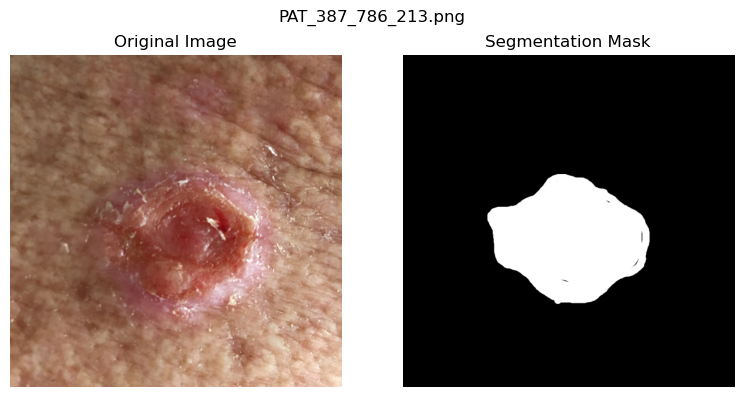

In [2]:
# Before we get started: let's load an image and its corresponding mask from the dataset
import numpy as np
import matplotlib.pyplot as plt

# Get a random image id, you can also specify one yourself
image_id = list(df["img_id"].sample(random_state=42))[0]

# Load the image/mask
file_im = img_path + image_id
file_mask = (mask_path + image_id).replace(".png", "_mask.png")

im = plt.imread(file_im)
mask = plt.imread(file_mask)

# View image/mask
im = plt.imread(file_im)
mask = plt.imread(file_mask)

# Display im and mask side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display im
axes[0].imshow(im)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display mask
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

#add overall title for the figure
fig.suptitle(f'{image_id}')

plt.tight_layout()
plt.show()

# You can now use "im" and "mask" to answer the questions above
# It might be worth to refactor the above code into a function, so you can quickly load different images and masks given an image ID


In [3]:
def load_image_and_mask(image_id, data_path=data_path):
    '''
    Docstring for load_image
    
    :param image_id: "img_id" from metadata.csv
    :param data_path: Relative path of the data folder

    This functions takes as input an image ID, 
    and returns the corresponding image and mask 
    (found in "/data/imgs/" and "/data/masks/" respectively)
    as an array
    '''
    
    img_path = data_path + "imgs/"
    mask_path = data_path + "masks/"

    # Load the image/mask
    file_im = img_path + image_id
    file_mask = (mask_path + image_id).replace(".png", "_mask.png")
    im = plt.imread(file_im)
    mask = plt.imread(file_mask)
    
    return im, mask

# Get a random image id
image_id = list(df["img_id"].sample(random_state=42))[0]
# Load image and mask
im, mask = load_image_and_mask(image_id)

* What can you say about the shape and type (what type of number is each value), are they the same or different for different images? 
    * What does a shape of an image tell us? Explain shape output (820, 615, 3) and (820, 615, 4).  

*The first two values are the **image dimensions**, note that not all the images are the same dimension.  
The third value corresponds to the **colour channel** RGB. In some images, this value is 4 and not 3, which indcates the inclusion of the alpha channel. In short, (10, 10, 3) is a 10x10 RGB image, (10, 10, 4) is a 10x10 RGBA image.*

In [4]:
# Check the shape
print(f'\n Image shape: {im.shape}, type is {im.dtype} \n Mask shape: {mask.shape}, type is {mask.dtype}')


 Image shape: (555, 555, 4), type is float32 
 Mask shape: (555, 555), type is float32


* How can we find darkest and brightest pixel values?  

*np.min() and np.max(), or similar methods.*

In [5]:
# Brightest and darkest pixel values
print(f'\n Image [min,max]: {[np.min(im), np.max(im)]} \n Mask [min,max]: {[np.min(mask), np.max(mask)]}')


 Image [min,max]: [0.015686275, 1.0] 
 Mask [min,max]: [0.0, 1.0]


* Look at the statistics like minimum and maximum values in the array, do they differ between images, or between images and masks?

In [6]:
# Differences in Min and Max values

# Random sample of 3 images/masks
image_list = list(df["img_id"].sample(n = 3, random_state=42))

min_values = []
max_values = []
for image in image_list:
    im, mask = load_image_and_mask(image)
    min, max = np.min(im), np.max(im)
    min_values.append(min)
    max_values.append(max)

print(f'\n Min and Max values for: \n {image_list}')
print(min_values)
print(max_values)

# There is a difference in the range of values accross images


 Min and Max values for: 
 ['PAT_387_786_213.png', 'PAT_838_1587_73.png', 'PAT_270_417_257.png']
[0.015686275, 0.0, 0.007843138]
[1.0, 1.0, 1.0]


* To help interpretability (values between 0 and 255) and reduce storage, you could consider using integers to represent the images instead of floating point numbers. You can use ndarray.astype() for this.

*Multiply the float values by 255 to convert to a more standard numerical representation of colours, and then convert the datatype to Int.*

In [2]:
# Change to int
im255 = im*255
im255 = im255.astype(int)
plt.imshow(im255)
print(f'\n Sample of {image_id} as an array, \n converted to standard 255 colour values, \n and the Int datatype: \n {im255[0][:3]}')

NameError: name 'im' is not defined

* What would be the color for pixel values = 0 ; 128 ; 255?

In [ ]:
# Color - alternative 1
def print_colour_bar(r, g, b):
    pixel = np.array([[[r,g,b]]])
    plt.imshow(pixel)
    plt.axis('off')
    plt.show()

print_colour_bar(255, 0, 0)

In [ ]:
# Color - alternative 2
# https://stackoverflow.com/questions/74589665/how-to-print-rgb-colour-to-the-terminal

def print_colour(r, g, b, size=8):
    colour = f"\033[48;2;{r};{g};{b}m"
    msg = " " * size
    end = "\033[0m"
    
    print(colour + msg + end) 
    

print_colour(0, 128, 255)

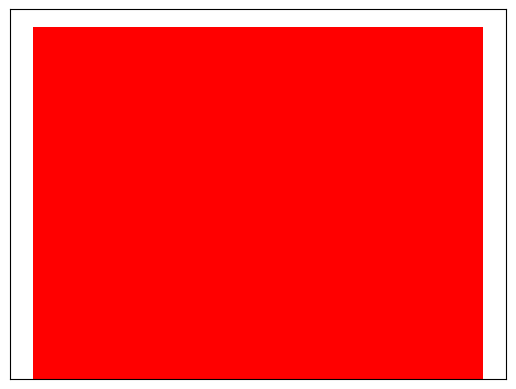

In [ ]:
# Color - alternative 3
def print_colour_bar(r, g, b):
    colours = [x/255 for x in [r,g,b]]
    fig, ax = plt.subplots()
    ax.bar(1, 1, color = [colours])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.show()
    
print_colour_bar(255, 0, 0)

---

## Selecting parts of the image

Suppose you want to crop the center area of the image (does not need to be exact).

Write code to
* Select only those pixels and display them
  * Hint: Use array slicing: im_crop = im[row_start:row_end, col_start:col_end, :]
* Write a function that lets you: (**optional**, but could be useful for your project)
  * Choose crop size (e.g. size = 100, meaning image is 100x100) 
  * Crops the image based on the center (also consider if the center of the image is equivalent to the center of the skin lesion)
  * Crops the image based on the mask boundaries 

Hint for center calculations:
- Get shape information: height = im.shape[0]  and
width = im.shape[1]
- Top edge: $rowstart = \frac{height}{2} - \frac{size}{2}$
- Bottom edge: $rowend = \frac{height}{2} + \frac{size}{2}$
- Repeat for columns using width

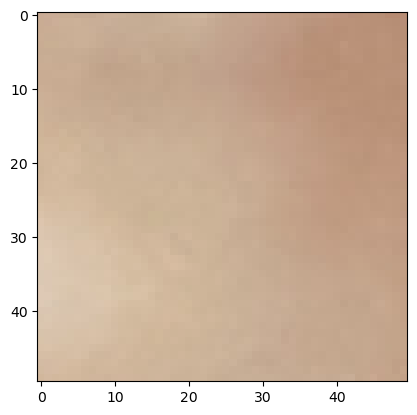

In [10]:
# Selecting a part of the image

# Define start location of your crop (origin)
# This essentially corresponds to the 'top left corner' of your cropped image
loc_x = 0
loc_y = 0

# Show 50x50 part of the image
crop_size = 50
im_crop = im[loc_y:loc_y+crop_size, loc_x:loc_x+crop_size, :]

plt.imshow(im_crop)

#### Function based on size

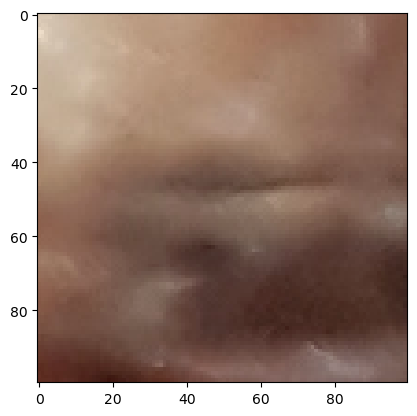

In [11]:
# define a function for cropping from top left corner
def crop_image_topleft(im, crop_size: int, loc_x=None, loc_y=None):
    """Crops a square part of the image from the top left corner given a starting location and crop size."""
    
    # Your code here
    loc_x = loc_x if loc_x is not None else 0
    loc_y = loc_y if loc_y is not None else 0

    h, w = im.shape[0], im.shape[1]

    if loc_x + crop_size > w or loc_y + crop_size > h:
        raise ValueError("Crop exceeds image boundaries.")
    
    cropped_im = im[loc_y:loc_y+crop_size, loc_x:loc_x+crop_size]

    return cropped_im   

im_crop_size = crop_image_topleft(im, 100, 150, 150)

plt.imshow(im_crop_size)
    

### Function based on center

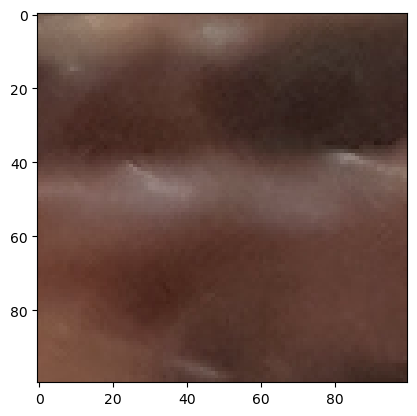

In [12]:
# define another function for cropping from a given center (including automatic center)
def crop_image_center(im, crop_size: int, loc_x=None, loc_y=None):
    """Crops a square part of the image from the center given a location and crop size."""
    
    # Your code here
    h, w = im.shape[0], im.shape[1]

    # find center automatically - note that the image center is not necessarily equivalent to the lesion center!
    if loc_x is None and loc_y is None:
        loc_x = (w - crop_size) // 2 
        loc_y = (h - crop_size) // 2 

    row_start = np.max([0, loc_y - crop_size // 2])
    row_end = np.min([h, loc_y + crop_size // 2])
    col_start = np.max([0, loc_x - crop_size // 2])
    col_end = np.min([w, loc_x + crop_size // 2])

    if loc_x + crop_size > w or loc_y + crop_size > h:
        raise ValueError("Crop exceeds image boundaries.")
    
    cropped_im = im[row_start:row_end, col_start:col_end]

    return cropped_im   

im_crop_center = crop_image_center(im, 100)

plt.imshow(im_crop_center)
    

### Function based on mask

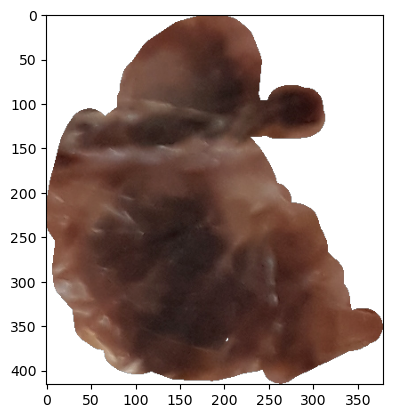

In [13]:
def crop_image_mask(im, mask):
    """Crops an image to the bounding box of the mask."""
    
    # Your code here
    rows = np.any(mask, axis=1) # true for rows with any mask pixel
    cols = np.any(mask, axis=0) # true for columns with any mask pixel
    y_min, y_max = np.where(rows)[0][[0, -1]] #get first and last true row
    x_min, x_max = np.where(cols)[0][[0, -1]] #get first and last true column   

    #apply mask to image and crop
    mask_bool = (mask > 0)                  
    masked_im = im * mask_bool[..., None] 

    cropped_im = masked_im[y_min:y_max+1, x_min:x_max+1]

    return cropped_im

im_crop_mask = crop_image_mask(im, mask)

plt.imshow(im_crop_mask)

---

## Color channels

* Select the red, green, blue channels of an image separately and display them. How do the intensities correspond to colors that you visually perceive in the image? You might want to find example images that are more "colorful" for this exercise.

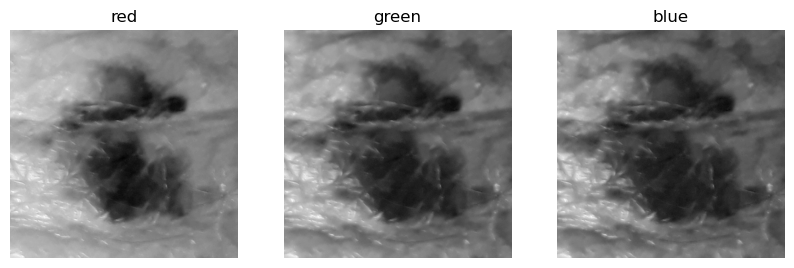

In [14]:
def display_colour_channels(im):
    im255 = im*255
    plt.figure(figsize=(10,12))

    colour_names = ["red", "green", "blue"]
    for i in range(3):
        colour_channel = im255[:,:,i]
        plt.subplot(1, 3, i + 1)
        plt.imshow(colour_channel, cmap='gray')
        plt.title(colour_names[i])
        plt.axis("off")

    plt.show()
    plt.close()
    
    return 

display_colour_channels(im)

---

## Intensity histogram

Now we look at the intensity histogram, which can be for the entire image if we convert it to grayscale, or just for a single channel. For grayscale conversion we use scikit-image (cousin of scikit-learn): https://scikit-image.org/

* Why do we need to add 0:3 in the rgb2gray conversion below?
* What does the flatten() function do and why do we need it?
* Is the default histogram generated with this code informative enough? How can you change it?

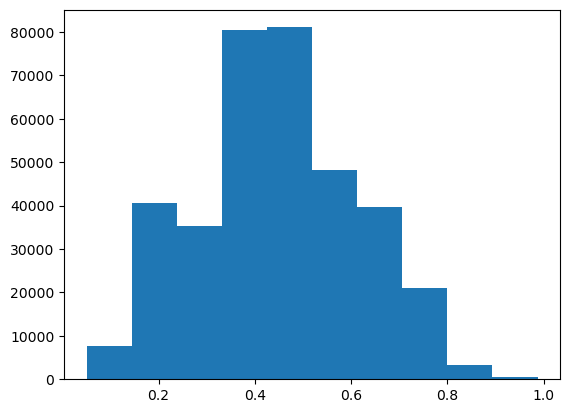

In [15]:
from skimage.color import rgb2gray

im_gray = rgb2gray(im[:,:,0:3])
hist = plt.hist(im_gray.flatten())

---
## Optional - Histogram equalisation

If you are ahead of time and want to practice with OpenCV and histogram equalisation (might be useful later in the project), you can go explore the code below. You might need to try with different images that appear to have low contrast.

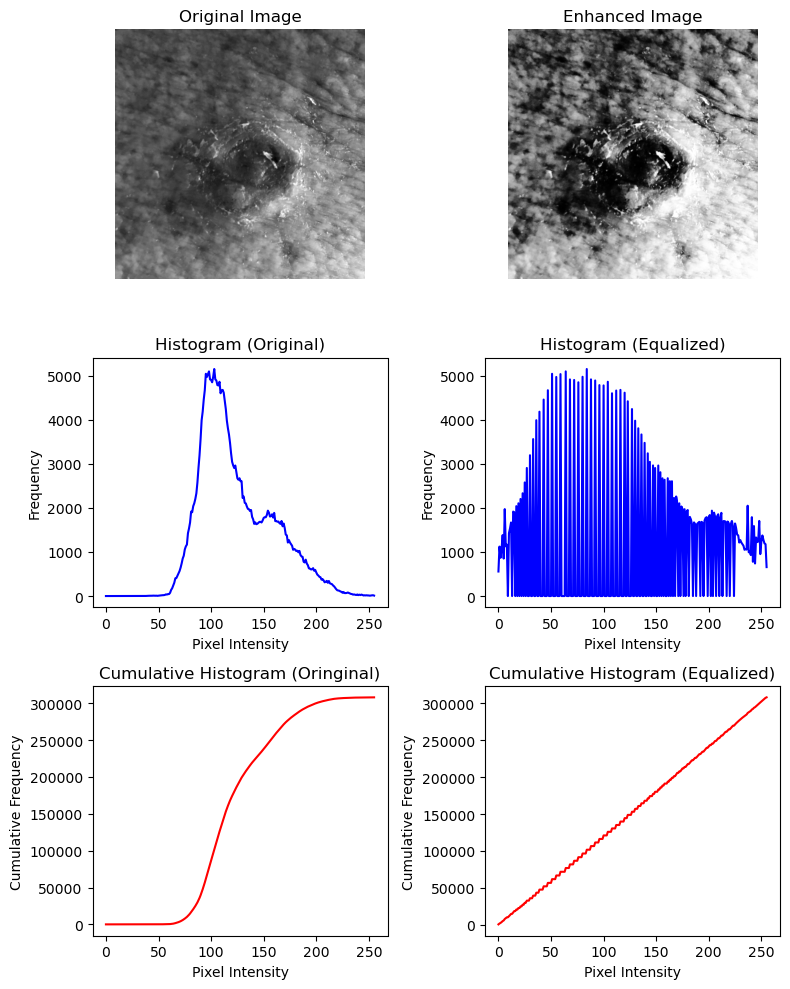

In [16]:
import cv2

img_bgr = cv2.imread(file_im)

# swap color channel from BGR to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# convert to grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


# apply histogram equalization to enhance contrast
equalized_img = cv2.equalizeHist(img_gray)

# calculate histogram
hist_org, _ = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
hist_equalized, _ = np.histogram(equalized_img.flatten(), bins=256, range=[0, 256])

# calculate cumulative histogram
cumul_hist_org = np.cumsum(hist_org)
cumul_hist_equalized = np.cumsum(hist_equalized)

# create subplots to display the images
plt.figure(figsize=(8, 10))

# display the original grayscale image
plt.subplot(3, 2, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Image")
plt.axis('off')

# display the equalized image
plt.subplot(3, 2, 2)
plt.imshow(equalized_img, cmap="gray")
plt.title("Enhanced Image")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.plot(hist_org, color='blue')
plt.title("Histogram (Original)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 4)
plt.plot(hist_equalized, color='blue')
plt.title("Histogram (Equalized)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")


plt.subplot(3, 2, 5)
plt.plot(cumul_hist_org, color='red')
plt.title("Cumulative Histogram (Oringinal)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Frequency")

plt.subplot(3, 2, 6)
plt.plot(cumul_hist_equalized, color='red')
plt.title("Cumulative Histogram (Equalized)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Frequency")

# show the plots
plt.tight_layout()
plt.show()

